This is a workthrough of the exercises in https://arxiv.org/abs/1008.4686

In [39]:
import numpy as np
from numpy.linalg import inv
import scipy
import matplotlib.pyplot as plt

%matplotlib inline

import seaborn as sns

In [3]:
# each row is x, y, sigma_y, sigma_x, rho_xy
# the covariance matrix for each data point is
# [sigma_x^2, rho_xy*sigma_x*sigma_y
# rho_xy*sigma_x*sigma_y, sigma_y^2]
data_raw = [
    [201, 592, 61, 9, -0.84],
    [244, 401, 25, 4, 0.31],
    [47, 583, 38, 11, 0.64],
    [287, 402, 15, 7, -0.27],
    [203, 495, 21, 5, -0.33],
    [58, 173, 15, 9, 0.67],
    [210, 479, 27, 4, -0.02],
    [202, 504, 14, 4, -0.05],
    [198, 510, 30, 11, -0.84],
    [158, 416, 16, 7, -0.69],
    [165, 393, 14, 5, 0.3],
    [201, 442, 25, 5, -0.46],
    [157, 317, 52, 5, -0.03],
    [131, 311, 16, 6, 0.5],
    [166, 400, 34, 6, 0.73],
    [160, 337, 31, 5, -0.52],
    [186, 423, 42, 9, 0.9],
    [125, 334, 26, 8, 0.4],
    [218, 533, 16, 6, -0.78],
    [146, 344, 22, 5, -0.56]
]

In [4]:
data = np.array(data_raw)

In [6]:
data.shape

(20, 5)

<Container object of 3 artists>

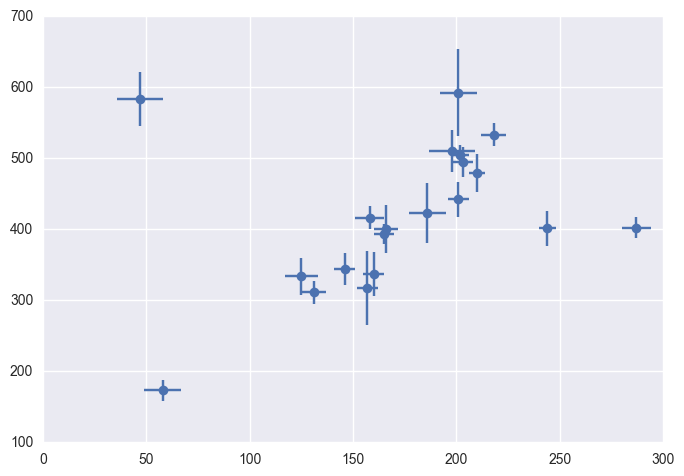

In [17]:
plt.errorbar(x=data[:,0], y=data[:,1], yerr=data[:,2], xerr=data[:,3], fmt='o')

# Exercise 1

This is the standard linear algebra method to fit $y = mx + b$

$\begin{bmatrix}b \\ m \end{bmatrix} = \mathbf{X} = \left[\mathbf{A}^{T} \mathbf{C}^{-1} \mathbf{A} \right]^{-1} \left[ \mathbf{A}^T \mathbf{C}^{-1} \mathbf{Y} \right]$

where

$\mathbf{Y} = \begin{bmatrix}y_1 \\ y_2 \\ y_3 \\ \cdots \\ y_N \end{bmatrix}$, 
$\mathbf{A} = \begin{bmatrix}1 & x_1 \\ 1 & x_2 \\ \cdots \\ 1 & x_N \end{bmatrix}$, 
$\mathbf{C} = \begin{bmatrix}\sigma^2_{y1} & 0 \cdots & 0 \\ 0 & \sigma^2_{y2} & \cdots & 0 \\ \cdots \\ 0 & 0 & \cdots & \sigma^2_{yN} \end{bmatrix}$

(yes, a stupid convention to name the $x$ data as $\mathbf{A}$)

Do a linear fit,  ingoring the first 4 points, and ignoring $\sigma_x$ and $\rho_{xy}$

In [123]:
def calc_simple_fit(x, y, y_err):
    C = np.mat(np.diag(y_err**2))
    Y = np.mat(y.T.reshape(len(y), 1))  # horrible!
    A = np.mat(np.concatenate([np.ones_like(x), x]).reshape(2, len(x)).T)
    inv_C = inv(C)
    A_T = A.T
    b, m = np.array(inv(A_T * inv_C * A) * (A_T * inv_C * Y)).T[0]
    # intercept, gradient
    return b, m

34.0477277575 2.23992083163


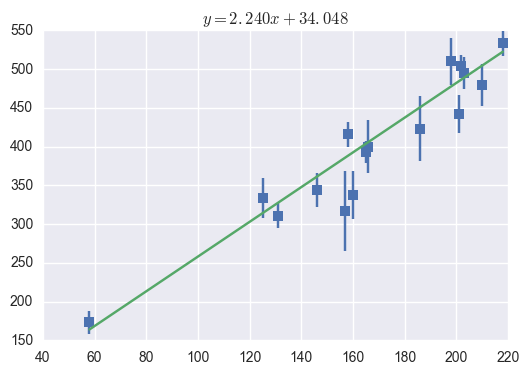

In [132]:
x = data[4:, 0]
y = data[4:,1]
y_err = data[4:, 2]

b, m = calc_simple_fit(x, y, y_err)
print b, m

plt.errorbar(x, y, yerr=y_err, fmt='s')
x_line = np.linspace(x.min(), x.max(), 100)
plt.plot(x_line, m*x_line + b)
plt.title(r"$y = %.3fx + %.3f$" % (m, b))

# Exercise 2

Repeat, but with all data points

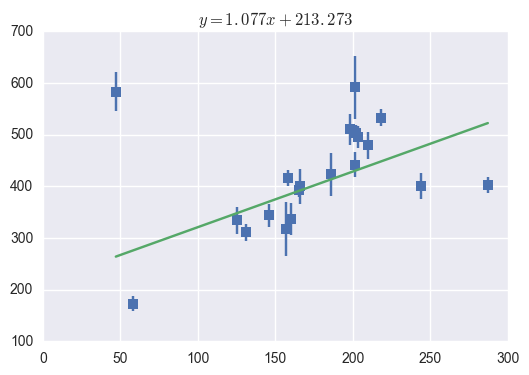

In [133]:
x = data[:, 0]
y = data[:,1]
y_err = data[:, 2]
b, m = calc_simple_fit(x, y, y_err)
plt.errorbar(x, y, yerr=y_err, fmt='s')
x_line = np.linspace(x.min(), x.max(), 100)
plt.plot(x_line, m*x_line + b)
plt.title(r"$y = %.3fx + %.3f$" % (m, b))

# Exercise 3

Generalise to quadratic scenario. Now:

$\mathbf{A} = \begin{bmatrix}1 & x_1 & x_1^2 \\ 1 & x_2 & x_2^2 \\ & \cdots \\ 1 & x_N & x_N^2 \end{bmatrix}$, 
$\mathbf{X} = \begin{bmatrix}b \\ m \\ q\end{bmatrix}$

such that

$y = qx^2 + mx + b$

In [134]:
def calc_simple_quadratic_fit(x, y, y_err):
    C = np.mat(np.diag(y_err**2))
    Y = np.mat(y.T.reshape(len(y), 1))
    A = np.mat(np.concatenate([np.ones_like(x), x, x**2]).reshape(3, len(x)).T)
    inv_C = inv(C)
    A_T = A.T
    b, m, q = np.array(inv(A_T * inv_C * A) * (A_T * inv_C * Y)).T[0]
    return b, m, q

72.8946264717 1.59605045227 0.00229888840812


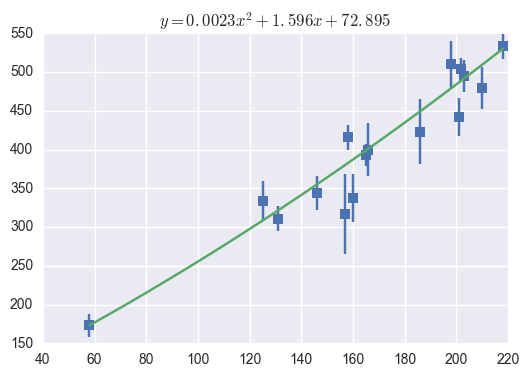

In [136]:
x = data[4:, 0]
y = data[4:,1]
y_err = data[4:, 2]

b, m, q = calc_simple_quadratic_fit(x, y, y_err)
print b, m, q

plt.errorbar(x, y, yerr=y_err, fmt='s')
x_line = np.linspace(x.min(), x.max(), 100)
plt.plot(x_line, q*x_line**2 + m*x_line + b)
plt.title(r"$y = %.4fx^2 + %.3fx + %.3f$" % (q, m, b))